In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal

In [149]:
ndata = 16
npars = 3

y = np.random.normal(0, 0.15, size=ndata)
t = np.random.uniform(size=ndata)
M = np.stack((np.ones(ndata),
              np.sin(t),
              np.cos(t))).T
C = np.diag(np.random.uniform(0.1, 0.2, size=ndata)**2)
Cinv = np.linalg.inv(C)

th = np.array([0., 1e-2, 1e-2])
mu = np.array([0, 0, 0.])
V = np.diag(np.exp(np.random.uniform(-1, 0, size=npars)))
Vinv = np.linalg.inv(V)

print(y.shape, M.shape, C.shape)
print(th.shape, mu.shape, V.shape)

norm_y = multivariate_normal(mean=M.dot(th), cov=C)
norm_th = multivariate_normal(mean=mu, cov=V)

(16,) (16, 3) (16, 16)
(3,) (3,) (3, 3)


In [150]:
Z = C.dot(M).dot(Vinv).dot(mu)
X = C + M.dot(V).dot(M.T)

Sig = np.linalg.inv(M.T.dot(Cinv).dot(M) + Vinv)
phi = Sig.dot(M.T.dot(Cinv).dot(y) + Vinv.dot(mu))

norm_th2 = multivariate_normal(mean=phi, cov=Sig)
norm_y2 = multivariate_normal(mean=Z, cov=X)

print(Z.shape, X.shape)

(16,) (16, 16)


In [151]:
assert np.allclose(np.linalg.det(C) * np.linalg.det(V),
                   np.linalg.det(Sig) * np.linalg.det(X))

In [156]:
eval_y = np.random.normal(y, size=(1024, ndata))
eval_th = np.random.normal(th, size=(1024, npars))

In [157]:
truth = norm_y.logpdf(eval_y) + norm_th.logpdf(eval_th)
test = norm_th2.logpdf(eval_th) + norm_y2.logpdf(eval_y)

(-1000, 0)

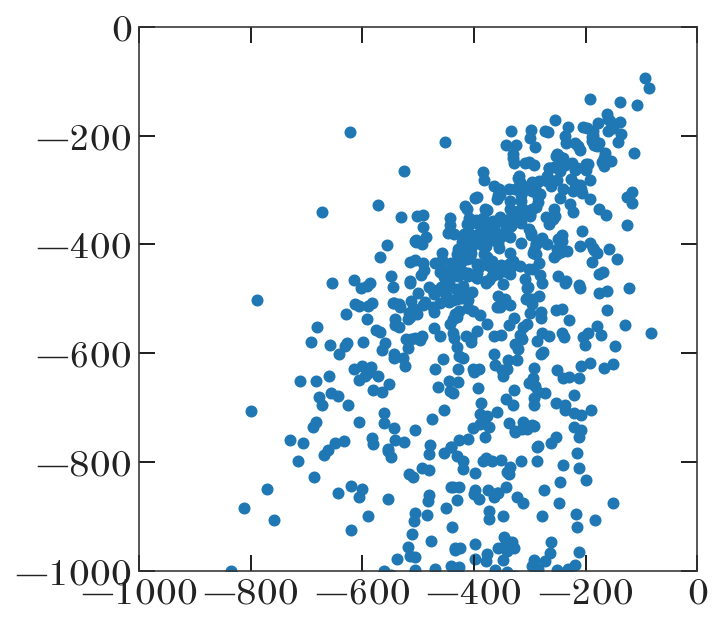

In [158]:
plt.figure(figsize=(5, 5))
plt.scatter(truth, test)
plt.xlim(-1000, 0)
plt.ylim(-1000, 0)

In [159]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [164]:
c = coord.SkyCoord(179, -29.5, unit=u.deg)
c.to_string('hmsdms')

'11h56m00s -29d30m00s'